# Convolution of 2 identical Sinc ftns

$$
f_3(t) = \int_{-\infty}^{\infty} f_1(\tau)f_2(t-\tau) d\tau
$$

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import scipy.integrate as integrate

Running Python: 3.8.19
Running Sympy: 1.12.1


In [2]:
p = 2 # scaling
tt_vals = linspace(-3, 3, 1000)

def integrand(tau, t):
    return np.sinc(p*tau) * np.sinc(p*(t - tau))

In [3]:
f3 = []
for t in tt_vals:
    f3.append(integrate.quad(integrand, -np.inf, np.inf, args=(t))[0])

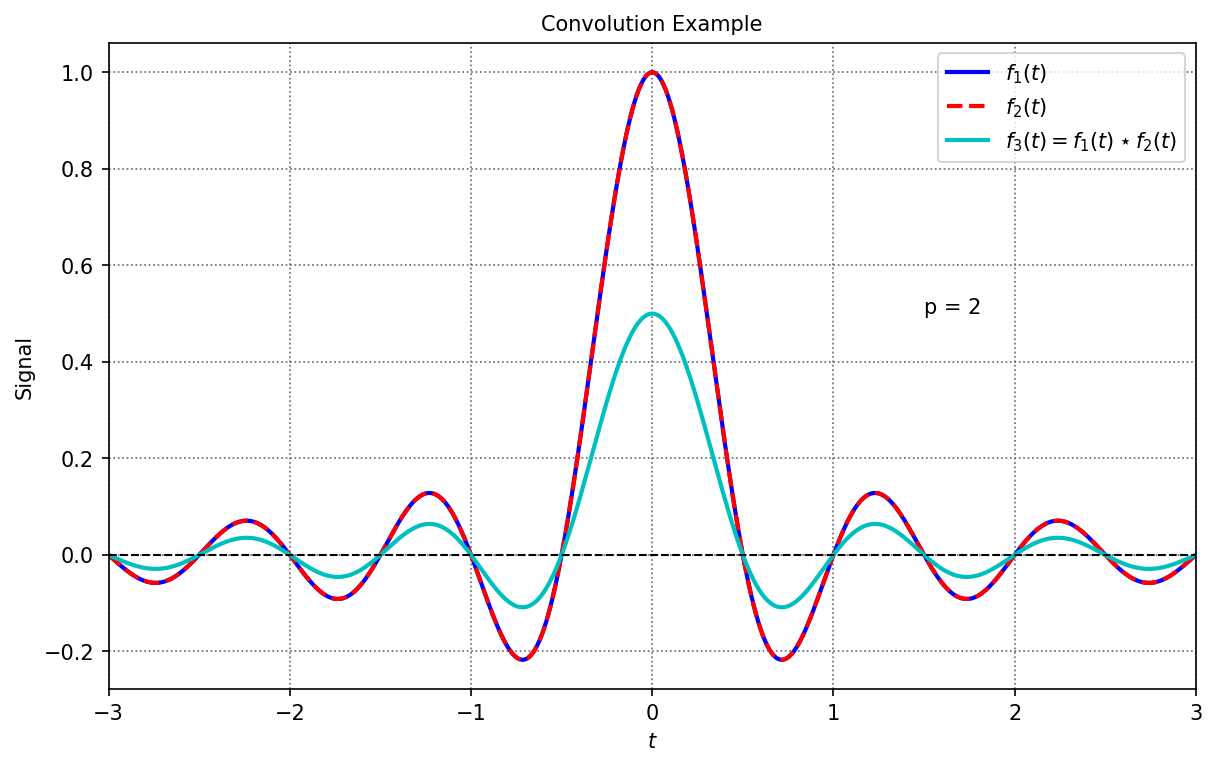

In [4]:
fig = plt.figure(1,figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt_vals, np.sinc(p*tt_vals),'b-',lw=2,label='$f_1(t)$')
plt.plot(tt_vals, np.sinc(p*tt_vals),'r--',label='$f_2(t)$')
plt.plot(tt_vals, f3,'c-',label=r'$f_3(t)=f_1(t) \star f_2(t)$')
nicegrid()
plt.text(1+1/p,1/p,'p = '+str(p))
plt.legend()
plt.ylabel("Signal")
plt.xlabel("$t$")
plt.title('Convolution Example')
plt.show()

## Explanation using Material from Topic 7

* Goal: compute ${\tt sinc}(pt) \star {\tt sinc}(pt)$ - calculation is doable, but clearly quite difficult to computate directly.

* Approach: know that ${\tt sinc}(pt) \Leftrightarrow \frac{1}{p} {\tt rect} (p f)$

* Now use Convolution $\Leftrightarrow$ Multiplication

$${\tt sinc}(pt) \star {\tt sinc}(pt) \Leftrightarrow \frac{1}{p} {\tt rect} (p f) \cdot \frac{1}{p} {\tt rect} (p f)
$$

* Recall special property that ${\tt rect} (p f) \cdot {\tt rect} (p f) = {\tt rect} (p f)$, so we have that the righthandside becomes
$$
\frac{1}{p} {\tt rect} (p f) \cdot \frac{1}{p} {\tt rect} (p f) \Rightarrow
\left(\frac{1}{p}\right)^2 {\tt rect}^2 (p f) \Rightarrow
\left(\frac{1}{p}\right)^2 {\tt rect} (p f) $$

* Now inverse transform the term on the right to get that 
$$\left(\frac{1}{p}\right) {\tt sinc}(pt) 
\Leftrightarrow \left(\frac{1}{p}\right) \left\{ \left(\frac{1}{p}\right) {\tt rect} (p f) \right\}
= \left(\frac{1}{p}\right)^2 {\tt rect} (p f) 
$$
